<a href="https://colab.research.google.com/github/RayOfLight07/Deep-Learning/blob/main/DL_LAB_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep learning Lab_________________________________________________________________________Name: Deepasnhu Rathore     
B.Tech. 5th Sem.
#**Experiment:- 09**
# Introduction to Object Detection and Perform Basic Implementation of Object Detection using the R-CNN Approach.

Date:04\11\2025____________________________________________________________________________________SAP: 500124406

# **AIM**
*   To implement the basic workflow of Region-based Convolutional Neural Networks (R-CNN) for object detection.

# **Objective**
*  To understand the concept of Region Proposals (identifying potential objects in an image).

*   To use Selective Search algorithm to generate these proposals.

*   To classify these regions using a pre-trained CNN to detect objects.


# **Theory**

*   Object Detection differs from classification because it not only identifies what is in the image but also where it is (using Bounding Boxes).

*   R-CNN (Regions with CNN features) was one of the first successful deep learning approaches for this. It works in three steps:

*   Region Proposals: Instead of scanning the whole image with a sliding window, it uses an algorithm called Selective Search to propose ~2000 candidate boxes (Regions of Interest - RoI) where objects might exist.

*   Feature Extraction: Each proposed region is warped (resized) to a fixed size and passed through a CNN (like AlexNet or VGG) to extract features.

*   Classification: A classifier (originally SVM, now often Softmax) decides if the region contains a specific object or background.
\











## Implementation

#**Import Libraries and Install Dependencies**
We need opencv-contrib-python for the Selective Search algorithm.

In [ ]:
!pip install opencv-contrib-python

import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

print("TensorFlow Version:", tf.__version__)
print("OpenCV Version:", cv2.__version__)

TensorFlow Version: 2.19.0
OpenCV Version: 4.12.0


# **Load an Image and Model**
 We will download a sample image (a dog and a sofa/chair) and load a pre-trained MobileNetV2 (lighter/faster than ResNet) to act as our classifier.

In [ ]:
!pip uninstall opencv-python -y

Found existing installation: opencv-python 4.12.0.88
Uninstalling opencv-python-4.12.0.88:
  Successfully uninstalled opencv-python-4.12.0.88


In [ ]:
!pip uninstall opencv-python-headless -y

Found existing installation: opencv-python-headless 4.12.0.88
Uninstalling opencv-python-headless-4.12.0.88:
  Successfully uninstalled opencv-python-headless-4.12.0.88


In [ ]:
!pip uninstall opencv-contrib-python -y

Found existing installation: opencv-contrib-python 4.12.0.88
Uninstalling opencv-contrib-python-4.12.0.88:
  Successfully uninstalled opencv-contrib-python-4.12.0.88


In [ ]:
!pip install opencv-contrib-python

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array

# Check if it works now (Should print True)
try:
    print("Selective Search Available:", hasattr(cv2.ximgproc, 'segmentation'))
except AttributeError:
    print("Error: Library still not loaded correctly. Please ensure you Restarted the Runtime.")

Selective Search Available: True


Saving dataset-card.jpeg to dataset-card.jpeg


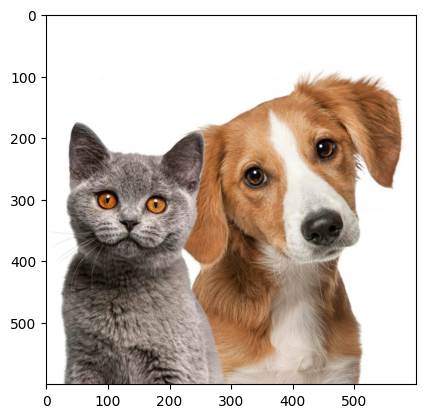

In [ ]:
from google.colab import files

# 1. Upload
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 2. Load Model
model = MobileNetV2(weights='imagenet')

# 3. Read & Resize Image
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize for speed
height, width, _ = image.shape
new_width = 600
new_height = int(height * (new_width / width))
image = cv2.resize(image, (new_width, new_height))

plt.imshow(image)
plt.show()

#**Perform Selective Search (Region Proposals)**
This function generates thousands of boxes where objects might be. This simulates the first stage of R-CNN.

In [ ]:
# Initialize Selective Search
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)
ss.switchToSelectiveSearchFast()

print("Generating Region Proposals...")
rects = ss.process()
print(f"Total Region Proposals: {len(rects)}")

Generating Region Proposals...
Total Region Proposals: 1185


# **The R-CNN Loop (Crop -> Resize -> Classify)**
 We will loop through the proposals, crop them, run them through the CNN, and if the confidence is high, draw the box.

Preprocessing top 2000 regions...
Classifying 495 regions... (this might take a moment)

--- Detection Results ---
Found: collie (Confidence: 0.57)
Found: grey_whale (Confidence: 0.58)
Found: affenpinscher (Confidence: 0.51)
Found: golden_retriever (Confidence: 0.60)
Found: Irish_terrier (Confidence: 0.62)
Found: Persian_cat (Confidence: 0.64)
Found: Brittany_spaniel (Confidence: 0.74)
Found: fur_coat (Confidence: 0.77)
Found: Siamese_cat (Confidence: 0.57)
Found: proboscis_monkey (Confidence: 0.60)
Found: beaver (Confidence: 0.54)
Found: paintbrush (Confidence: 0.75)
Found: lesser_panda (Confidence: 0.58)
Found: Egyptian_cat (Confidence: 0.54)
Found: velvet (Confidence: 0.75)
Found: brown_bear (Confidence: 0.59)
Found: great_grey_owl (Confidence: 0.53)
Found: broom (Confidence: 0.69)
Found: komondor (Confidence: 0.67)
Found: tabby (Confidence: 0.59)
Found: tiger_cat (Confidence: 0.51)
Found: lynx (Confidence: 0.59)


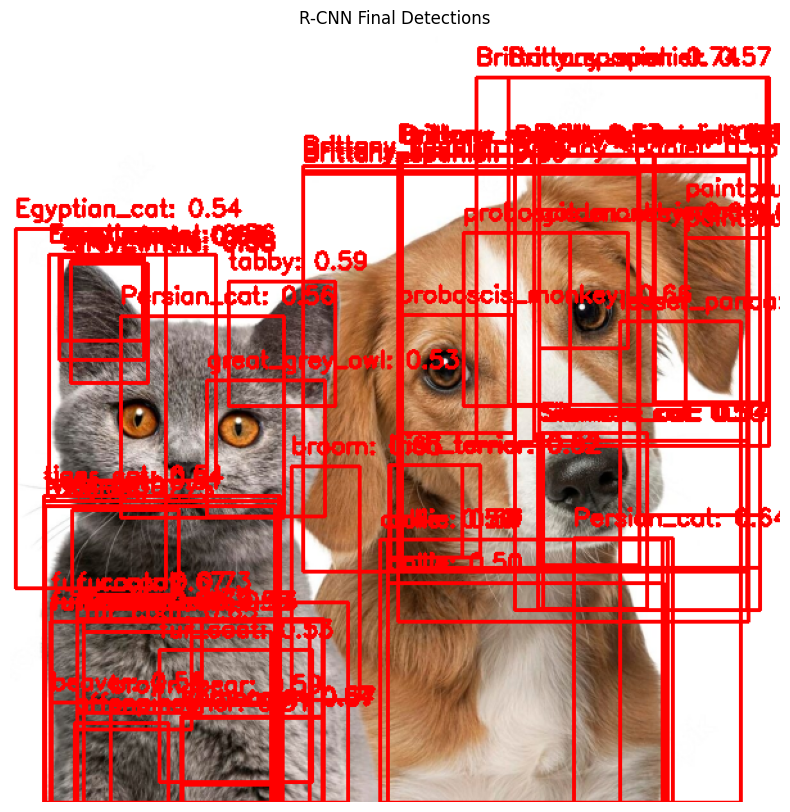

In [ ]:
# R-CNN Classification Loop
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array

# Settings
PROPOSAL_LIMIT = 2000  # Number of regions to check (Higher = slower but better detection)
INPUT_SIZE = (224, 224) # Input size for MobileNetV2

proposals = []
boxes = []

print(f"Preprocessing top {PROPOSAL_LIMIT} regions...")

# 1. Loop through the proposed rectangles
for (x, y, w, h) in rects[:PROPOSAL_LIMIT]:
    # Filter out small noise boxes
    if w < 50 or h < 50:
        continue

    # Crop the region from the image
    roi = image[y:y+h, x:x+w]

    # Resize to 224x224 (what the model expects)
    roi = cv2.resize(roi, INPUT_SIZE)

    # Preprocess
    roi = img_to_array(roi)
    roi = preprocess_input(roi)

    proposals.append(roi)
    boxes.append((x, y, w, h))

# Convert list to numpy array for batch prediction
proposals = np.array(proposals)

# 2. Predict on ALL proposals at once (Batch Prediction)
print(f"Classifying {len(proposals)} regions... (this might take a moment)")
preds = model.predict(proposals, verbose=0)
decoded = decode_predictions(preds, top=1)

# 3. Filter and Draw Results
output_img = image.copy()
found_objects = False
detected_labels = []

print("\n--- Detection Results ---")
for i, p in enumerate(decoded):
    (imagenet_id, label, prob) = p[0]

    # THRESHOLD: Only show detections with > 90% confidence
    # If your image is not being detected, lower this to 0.5
    if prob > 0.50:
        (x, y, w, h) = boxes[i]

        # Draw Box (Red)
        cv2.rectangle(output_img, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Draw Label
        text = f"{label}: {prob:.2f}"
        y_text = y - 10 if y - 10 > 10 else y + 10
        cv2.putText(output_img, text, (x, y_text), cv2.LINE_AA, 0.6, (255, 0, 0), 2)

        if label not in detected_labels:
            print(f"Found: {label} (Confidence: {prob:.2f})")
            detected_labels.append(label)

        found_objects = True

plt.figure(figsize=(10,10))
plt.imshow(output_img)
plt.title("R-CNN Final Detections")
plt.axis('off')
plt.show()

if not found_objects:
    print("No objects found with >90% confidence. Try lowering the threshold in the code.")

# **Observations**


*   Selective Search generated thousands of boxes. Most were background, but some perfectly framed the objects.


*   The CNN (MobileNet) successfully classified the cropped regions.

*   We observed that R-CNN is computationally expensive because it has to run the CNN prediction hundreds of times (once for each region proposal), which is why modern algorithms like YOLO or Faster R-CNN are preferred for real-time applications.


# **Conclusion**


1.   We successfully implemented the core logic of the R-CNN approach: Region Proposal -> Feature Extraction -> Classification.

2.   This demonstrated how deep learning can be combined with classical computer vision (segmentation) to solve object detection tasks.




